### Implementation of the codes developed, openTURNS style


In [2]:
import openturns as ot
import numpy as np

We will use again the example developed, concerning the bending beam with random structural parameters. 
There will be some key differences with the first pipeline, as we will limit ourselves to a subset of the cases treated, and  not write some 'omnipotent' code.

In this new case, we will study the influence of each compônent of an aggreagated process (a collection of processes  each defined on a same shaped mesh), on a other aggregated process, by computing sobol sobol indices. 

To mimic other behaviours we can : 
    - Define a scalar random variable as a constant field or vector
    
###### Class will be intialized as so:
myAnalysis = ot.newSaltelliSensitivityAlgorithm(AggregatedProcess, FieldFunction, N, computeSecondOrder) 

This beahviour is based on the existing class: ot.SaltelliSensitivityAlgorithm






ot.RandomGenerator.SetSeed(0) 

baseDim = 1 #dimension of our process, the beam is 1D


# we have 2 processes in our problem, initially
#For young modulus:
amplitude = [5000]
scale = [300]
nu = 13/3
Model = MaternModel 

#For diameter:


In [3]:
import spsa 
# first some differences with the codes already written. For stochastic process construction:
process_E = spsa.StochasticProcessConstructor(dimension=1,
                                        grid_shape=[[0,1000,100],],
                                        covariance_model={'Model':'MaternModel',
                                                        'amplitude':[50000],
                                                        'scale':[300],
                                                        'nu':13/3},
                                        trend_arguments=['x'],trend_function=210000)
process_E.setName('E_')
# this is the new way. 

# The old way:
dim = 1
amplitude = [50000]*dim
scale = [300]*dim
nu = 13/3
model = ot.MaternModel(scale, amplitude, nu)
#grid is 1D so for openturns it is a time grid
t0 = 0.0
step = 1000/101
N = 101
grid = ot.RegularGrid(t0, step, N)
func = ot.SymbolicFunction(['x'],['210000'])
trendFunc = ot.TrendTransform(func, grid)
process = ot.GaussianProcess(trendFunc, model, grid)

algorithm = ot.KarhunenLoeveP1Algorithm(grid, model, 1e-3)
algorithm.run()
results = algorithm.getResults()


In [4]:
# we will define the processes using the new codes anyway for convenience, but this is not the right way 
# in this case
# In our beam bending problem, we have 5 variables: 2 processes and 3 random variables.
# let's first define the processes :
# young's modulus :
process_E = spsa.StochasticProcessConstructor(dimension=1,
                                        grid_shape=[[0,1000,100],],
                                        covariance_model={'Model':'MaternModel',
                                                        'amplitude':[50000],
                                                        'scale':[300],
                                                        'nu':13/3},
                                        trend_arguments=['x'],trend_function=210000)
process_E.setName('E_')
# diameter :
process_D = spsa.StochasticProcessConstructor(dimension=1,
                                        grid_shape=[[0,1000,100],],
                                        covariance_model={'Model':'MaternModel',
                                                        'amplitude':[.3],
                                                        'scale':[250],
                                                        'nu':13/3},
                                        trend_arguments=['x'],trend_function=10)
process_D.setName('D_')
# Now the random variables. As we have a different approach now, we want' to represent the scalar 
# random variables as stochastic fields, where each realization would be constant. 
# The original way is as follows :
###########################################################################################################
# random variable for the density of the material (kg/m³)
rho         = 7850.
sigma       = 750
nameD       = 'Rho'
RV_Rho = ot.Normal(rho, sigma)
RV_Rho.setName(nameD)
###########################################################################################################
# random variable for the position of the force   (mm) 
middle       = 500
sigma_f      = 50
namePos     = 'FP'
RV_Fpos = ot.Normal(middle, sigma_f)
RV_Fpos.setName(namePos)

###########################################################################################################
# random variable for the norm of the force    (N)
muForce       = 100
# we go from sigma = 15 to sigma = 1.5, as the influence is too important
sigma_Fnor    = 5.5
nameNor       = 'FN'
RV_Fnorm  = ot.Normal(muForce, sigma_Fnor)
RV_Fnorm.setName(nameNor)

Now that we have expressed everything as a stochasticProcess, we can construct an aggregated process containg all the input data. 

In [31]:
aggregatedProcess = ot.AggregatedProcess([process_E.GaussianProcess,
                                          process_D.GaussianProcess,
                                          SP_Rho.GaussianProcess,
                                          SP_Fpos.GaussianProcess,
                                          SP_Fnorm.GaussianProcess])

In [37]:
u=SP_Fnorm.getSample(50)

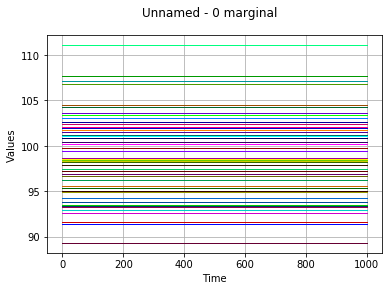

In [38]:
ot.Show(u.drawMarginal())

In [34]:
x = aggregatedProcess.getRealization()

In [29]:
process

class=GaussianProcess mesh=class=Mesh name=Unnamed dimension=1 vertices=class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=101 dimension=1 description=[t] data=[[0],[9.90099],[19.802],[29.703],[39.604],[49.505],[59.4059],[69.3069],[79.2079],[89.1089],[99.0099],[108.911],[118.812],[128.713],[138.614],[148.515],[158.416],[168.317],[178.218],[188.119],[198.02],[207.921],[217.822],[227.723],[237.624],[247.525],[257.426],[267.327],[277.228],[287.129],[297.03],[306.931],[316.832],[326.733],[336.634],[346.535],[356.436],[366.337],[376.238],[386.139],[396.04],[405.941],[415.842],[425.743],[435.644],[445.545],[455.446],[465.347],[475.248],[485.149],[495.05],[504.95],[514.851],[524.752],[534.653],[544.554],[554.455],[564.356],[574.257],[584.158],[594.059],[603.96],[613.861],[623.762],[633.663],[643.564],[653.465],[663.366],[673.267],[683.168],[693.069],[702.97],[712.871],[722.772],[732.673],[742.574],[752.475],[762.376],[772.277],[782.178],[792.079],[801.98],[811.881],[821.782],[831.683],[841.584],[851.485],[861.386],[871.287],[881.188],[891.089],[900.99],[910.891],[920.792],[930.693],[940.594],[950.495],[960.396],[970.297],[980.198],[990.099]] simplices=[[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11],[11,12],[12,13],[13,14],[14,15],[15,16],[16,17],[17,18],[18,19],[19,20],[20,21],[21,22],[22,23],[23,24],[24,25],[25,26],[26,27],[27,28],[28,29],[29,30],[30,31],[31,32],[32,33],[33,34],[34,35],[35,36],[36,37],[37,38],[38,39],[39,40],[40,41],[41,42],[42,43],[43,44],[44,45],[45,46],[46,47],[47,48],[48,49],[49,50],[50,51],[51,52],[52,53],[53,54],[54,55],[55,56],[56,57],[57,58],[58,59],[59,60],[60,61],[61,62],[62,63],[63,64],[64,65],[65,66],[66,67],[67,68],[68,69],[69,70],[70,71],[71,72],[72,73],[73,74],[74,75],[75,76],[76,77],[77,78],[78,79],[79,80],[80,81],[81,82],[82,83],[83,84],[84,85],[85,86],[86,87],[87,88],[88,89],[89,90],[90,91],[91,92],[92,93],[93,94],[94,95],[95,96],[96,97],[97,98],[98,99],[99,100]] trend=class=TrendTransform inherited from class=VertexValueFunction evaluation=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x,x0,y0] evaluationImplementation=class=TrendEvaluation name=Unnamed function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x] outputVariablesNames=[y0] formulas=[210000] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x] outputVariablesNames=[y0] formulas=[210000] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x] outputVariablesNames=[y0] formulas=[210000] gradientImplementation=class=CenteredFiniteDifferenceGradient name=Unnamed epsilon=class=Point name=Unnamed dimension=2 values=[1e-05,1e-05] evaluation=class=TrendEvaluation name=Unnamed function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x] outputVariablesNames=[y0] formulas=[210000] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x] outputVariablesNames=[y0] formulas=[210000] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x] outputVariablesNames=[y0] formulas=[210000] hessianImplementation=class=CenteredFiniteDifferenceHessian name=Unnamed epsilon=class=Point name=Unnamed dimension=2 values=[0.0001,0.0001] evaluation=class=TrendEvaluation name=Unnamed function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x] outputVari

In [30]:
process_E

Stochastic Process on grid of shape [100] and MaternModel covariance Model 
HELP:

This class allows for the creation of multi dimensional stochastic processes.
The process is defined through the specification of:
  - The mesh on top of wich the model is built.
  - The covariance model
  - A trend function (optional), default is '0'

Usage is as follows:

 0. Create the process:

  >>> import spsa
  >>> process=spsa.StochasticProcessConstructor()

 1. Set the dimension of the process with the self.setDimension() method:

  >>> process.setDimension(2)

 2. Set the processes grid shape  with the self.setGrid() method:

  >>> # 2 dimensional grid with  10 x 10 elements of 1 x 1 unit size:
  >>> process.setGrid([[0,1,10],[0,1,10],])

 3. Set Covariance model through the self.setCovarianceModel() method:

Note
----
All openTURNS covariance model names are passable as a string to the keywords
of a dictionary describing the processes model
Here the 'MaternModel' is used as an example. For other Models refer to the
openTURNS documentation. https://openturns.github.io/
The covariance model can also be passed as an already constructed openturns
CovarianceModel object

  >>> process.setCovarianceModel(
  >>>   {"Model":"MaternModel",
  >>>   "amplitude": float,
  >>>   "scale": float,
  >>>   "nu": float})

 4. Optional. Set trend function through the setTrend() method.

  >>> process.setTrend(arguments = ['X','Y'],
  >>>   trendOrFunc = '-0.5*X+0.5*Y+1')

 5. Set the gaussian process using the self.setGaussianProcess() method

  >>> process.setGaussianProcess()

 6. Generate single realizations or get samples:

  >>> otField = process.getRealization()
  >>> npField = process.getRealization(True) #output as numpy array
  >>> otSample = process.getSample(N)
  >>> npSample = process.getSample(N,True) #output as numpy array